In [1]:
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt

# 在 Jupyter Notebook 中让图像直接显示
%matplotlib inline

In [2]:
CHECKERBOARD = (7,7)

images = glob.glob('./CC/*.jpg')

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# 世界坐标系下的3D点 (z=0)
objp = np.zeros((CHECKERBOARD[0]*CHECKERBOARD[1], 3), np.float32)
objp[:, :2] = np.mgrid[0:CHECKERBOARD[0], 0:CHECKERBOARD[1]].T.reshape(-1, 2)

objpoints = []
imgpoints = []

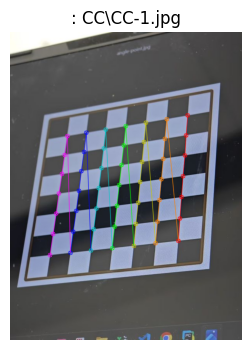

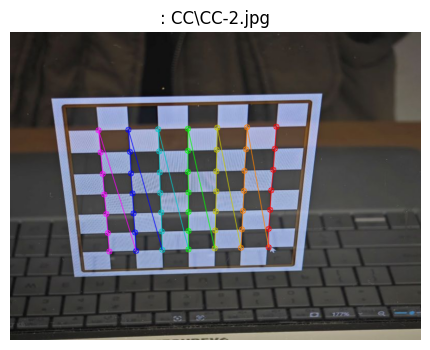

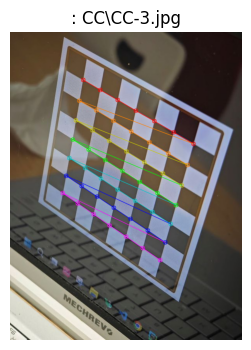

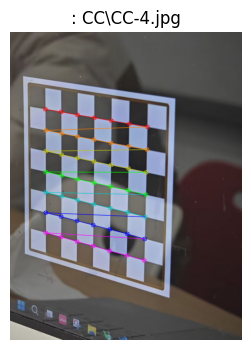

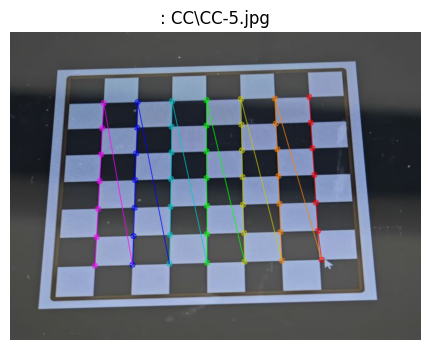

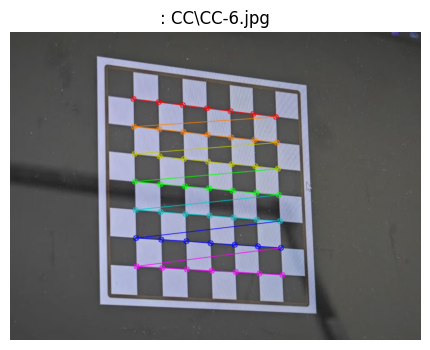

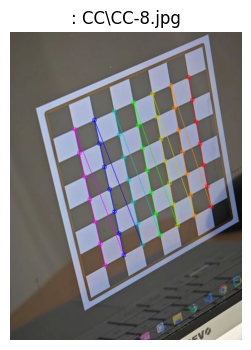

In [3]:
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # 寻找角点
    ret, corners = cv2.findChessboardCorners(gray, CHECKERBOARD, None)

    if ret:
        objpoints.append(objp)
        corners2 = cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)
        imgpoints.append(corners2)

        # 画出角点
        img_drawn = cv2.drawChessboardCorners(img.copy(), CHECKERBOARD, corners2, ret)
        img_rgb = cv2.cvtColor(img_drawn, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(6, 4))
        plt.imshow(img_rgb)
        plt.title(f': {fname.split("/")[-1]}')
        plt.axis('off')
        plt.show()



In [4]:
# 标定相机
ret, camera_matrix, dist_coeffs, rvecs, tvecs = cv2.calibrateCamera(
    objpoints, imgpoints, gray.shape[::-1], None, None)

# 输出结果
print("\n标定结果")
print("相机内参矩阵:\n", camera_matrix)
print("畸变系数:\n", dist_coeffs.ravel())
print("平均重投影误差:")

# 计算重投影误差
mean_error = 0
for i in range(len(objpoints)):
    imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], camera_matrix, dist_coeffs)
    error = cv2.norm(imgpoints[i], imgpoints2, cv2.NORM_L2) / len(imgpoints2)
    mean_error += error
print(mean_error / len(objpoints))

# 保存标定参数
np.savez("camera_calib.npz", camera_matrix=camera_matrix, dist_coeffs=dist_coeffs)


标定结果
相机内参矩阵:
 [[2.42530966e+03 0.00000000e+00 2.35066053e+02]
 [0.00000000e+00 2.38308582e+03 3.70005227e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
畸变系数:
 [ 1.36109004e+00 -6.74077623e+01 -1.32606218e-02 -2.58301336e-02
  1.28033851e+03]
平均重投影误差:
0.09123640550308419


!["result"](CC-result.jpg)

